<a href="https://colab.research.google.com/github/Ashborn69/AI-Club-project/blob/main/ML_project_AI_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [7]:
data = pd.read_csv('salary_data.csv')

In [8]:
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
data.describe

<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

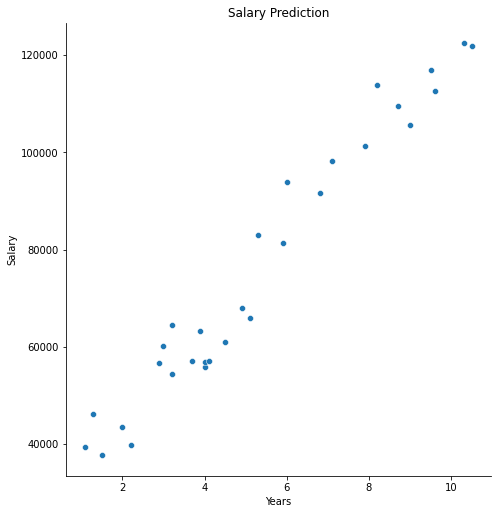

In [13]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [14]:
X = data[['YearsExperience']]
y = data[['Salary']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
import statsmodels.api as sm
X_addC = sm.add_constant(X_train)
model = sm.OLS(y_train, X_addC).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.91e-17
Time:                        13:13:32   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2285.938     11.077      0.000    2.06e+04    3.01e+04
YearsExperience  9423.8153    385.233     24.463      0.000    8624.891    1.02e+04
==============================================================================
Omnibus:                        0.647   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.697
Skew:                           0.323   Prob(JB):                        0.706
Kurtosis:                       2.472   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
print(model.rsquared, model.rsquared_adj)

0.9645401573418148 0.9629283463118973


In [20]:
X_test_c = sm.add_constant(X_test)

y_pred = model.predict(X_test_c)

[9423.81532303] [25321.58301178]


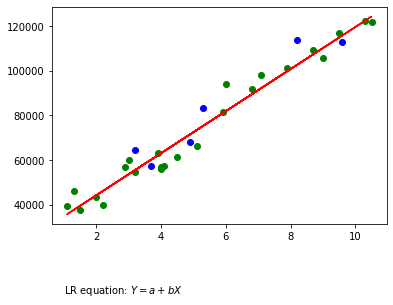

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


X = np.array(X_train).reshape((-1, 1))
model = LinearRegression().fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot()

plt.scatter(X_train, y_train, color='g')
plt.scatter(X_test, y_test, color='b')

plt.plot(X_train, model.predict(X_train),color='r')
ax.text(1, 4, r'LR equation: $Y = a + bX$', fontsize=10)

print(model.coef_[0], model.intercept_)

In [23]:
X_test['Prediction']=y_pred
X_test['y_test'] = y_test
X_test

,YearsExperience,Prediction,y_test
27,9.6,115790.210113,112635.0
15,4.9,71498.278095,67938.0
23,8.2,102596.868661,113812.0
17,5.3,75267.804224,83088.0
8,3.2,55477.792045,64445.0
9,3.7,60189.699707,57189.0
